In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# %matplotlib inline

In [4]:
# MNIST IMAGE --> Tensors

In [5]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='PYTORCH_NOTEBOOKS/Data', train=True, download=True, transform=transform)

In [7]:
test_data = datasets.MNIST(root='PYTORCH_NOTEBOOKS/Data', train=False, download=True, transform=transform)

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: PYTORCH_NOTEBOOKS/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: PYTORCH_NOTEBOOKS/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
type(train_data[0])

tuple

In [12]:
train_data[0] 
# the first item of this tuple is 
# the 28 by 28 tensor representing the image

# the second item is the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
image, label = train_data[0]

In [14]:
image.shape 
# 1 means greyscale image --> single color channel for black or white

torch.Size([1, 28, 28])

In [15]:
label

5

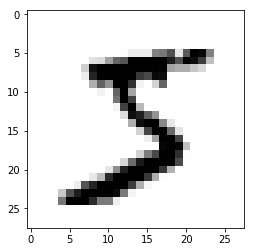

In [16]:
plt.imshow(image.reshape((28, 28)), cmap='gist_yarg') 

In [17]:
torch.manual_seed(101)

# 0 images, 1 images, ...
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [18]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # formatting


In [19]:
# to grab only first batch
for images, labels in train_loader:
    break

In [20]:
images.shape

torch.Size([100, 1, 28, 28])

In [21]:
labels.shape

torch.Size([100])

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


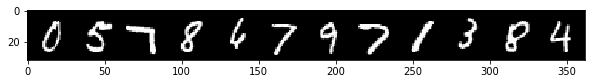

In [22]:
# print the first 12 labels
print('Labels: ', labels[:12].numpy())
# print the first 12 images
im = make_grid(images[:12], nrow=12) # the default nrow is 8
plt.figure(figsize=(10, 4))
# we need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [23]:
class MultilayerPerceptron(nn.Module):
    
    # layers=[120, 84] --> 120 neurons in h1 and 84 in h2
    def __init__(self, input_size=784, output_size=10, layers=[120, 84]):
        super().__init__()
        
        self.fullyconnected1 = nn.Linear(input_size, layers[0])
        self.fullyconnected2 = nn.Linear(layers[0], layers[1])
        self.fullyconnected3 = nn.Linear(layers[1], output_size)
        
    def forward(self, x):
        
        x = F.relu(self.fullyconnected1(x))
        x = F.relu(self.fullyconnected2(x))
        x = F.log_softmax(self.fullyconnected3(x), dim=1)
        
        return x # multi class classification

In [24]:
torch.manual_seed(101)
model = MultilayerPerceptron()

model

MultilayerPerceptron(
  (fullyconnected1): Linear(in_features=784, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
# ann --> cnn
total_parameters = 0 
for param in model.parameters():
    print(param.numel())
    total_parameters += param.numel()
    
print(f'totall parameters {total_parameters}')
# too many parameters so we need cnn

94080
120
10080
84
840
10
totall parameters 105214


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
images.shape # ([100, 1, 28, 28]) --> ([100, 784])

torch.Size([100, 1, 28, 28])

In [28]:
images.view(100, -1).shape
# '-1' is short way to say 
# "grab all these dimensions 
# and combine them into single dimension"

torch.Size([100, 784])

In [29]:
import time
start_time = time.time()

# TRAINING

epochs = 10

# trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    # train_loader returns the image and its label
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # b --> current batch 
        b += 1
        
        # at last layer 10 neurons
        # each has prediction for each label
        # like
        # label:     1      2     3
        # result: 0.01  0.104  0.98 ---> answer is "3"
        
        y_pred = model(X_train.view(100, -1)) # get pred based on image
        loss = criterion(y_pred, y_train) # compare y_pred to rhe correct label
        predicted = torch.max(y_pred.data, 1)[1] # grab maximal predicted
        batch_correct = (predicted == y_train).sum() # see how many pred values we matched up
        trn_corr += batch_correct # to track how many correct at epoch
        
        optimizer.zero_grad() # run backpropagation
        loss.backward()
        optimizer.step()
        
        if (b % 200) == 0:
            acc = trn_corr.item() * 100 / (100 * b)
            print(f'Epoch {i} batch {b} loss: {loss.item()} accuracy: {acc}')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    # do the same for test set
    with torch.no_grad(): 
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500, -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
            
            

total_time = time.time() - start_time
print(f'Duration: {total_time / 60} mins')

Epoch 0 batch 200 loss: 0.2805540859699249 accuracy: 83.04
Epoch 0 batch 400 loss: 0.2030348777770996 accuracy: 87.325
Epoch 0 batch 600 loss: 0.20227622985839844 accuracy: 89.32333333333334
Epoch 1 batch 200 loss: 0.1445707380771637 accuracy: 94.56
Epoch 1 batch 400 loss: 0.10489674657583237 accuracy: 95.11
Epoch 1 batch 600 loss: 0.12034717202186584 accuracy: 95.34666666666666
Epoch 2 batch 200 loss: 0.11627225577831268 accuracy: 96.53
Epoch 2 batch 400 loss: 0.08906283974647522 accuracy: 96.615
Epoch 2 batch 600 loss: 0.10235454887151718 accuracy: 96.74
Epoch 3 batch 200 loss: 0.0535891056060791 accuracy: 97.475
Epoch 3 batch 400 loss: 0.05533472076058388 accuracy: 97.485
Epoch 3 batch 600 loss: 0.05723270773887634 accuracy: 97.51
Epoch 4 batch 200 loss: 0.1291753500699997 accuracy: 97.96
Epoch 4 batch 400 loss: 0.09339293837547302 accuracy: 97.995
Epoch 4 batch 600 loss: 0.13001050055027008 accuracy: 98.03333333333333
Epoch 5 batch 200 loss: 0.04575703293085098 accuracy: 98.31
Epoc

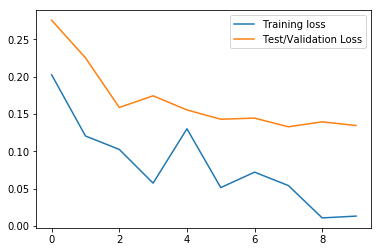

In [30]:
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="Test/Validation Loss")
plt.legend()

In [31]:
train_acc = [t / 600 for t in train_correct]
train_acc

[tensor(89),
 tensor(95),
 tensor(96),
 tensor(97),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(99),
 tensor(99)]

In [32]:
test_acc = [t / 100 for t in test_correct]
test_acc

[tensor(94),
 tensor(96),
 tensor(96),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97)]

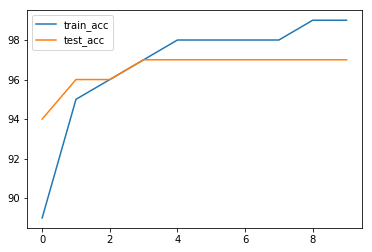

In [33]:
plt.plot(train_acc, label="train_acc")
plt.plot(test_acc, label="test_acc")
plt.legend()

In [34]:
# for unseen data

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [35]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [36]:
100 * correct.item() / len(test_data)

97.66

In [37]:
# the diagonals how many its getting right per class 
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 971,    0,    3,    0,    2,    3,    4,    1,    3,    2],
       [   0, 1120,    2,    0,    0,    0,    4,    2,    0,    2],
       [   1,    4, 1003,    1,    1,    0,    3,    6,    3,    0],
       [   3,    3,    9,  999,    1,   18,    1,    3,    8,   14],
       [   0,    0,    3,    0,  963,    3,    5,    2,    2,   12],
       [   0,    0,    0,    1,    0,  856,    3,    0,    2,    5],
       [   0,    2,    1,    0,    4,    6,  937,    0,    1,    0],
       [   0,    1,    6,    5,    3,    1,    0, 1010,    4,   10],
       [   3,    5,    5,    3,    2,    5,    1,    2,  949,    6],
       [   2,    0,    0,    1,    6,    0,    0,    2,    2,  958]],
      dtype=int64)

In [38]:
torch.save(model.state_dict(), 'my_mnist_model.pt')

In [39]:
loaded_model = MultilayerPerceptron()

In [40]:
loaded_model.load_state_dict(torch.load('my_mnist_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [41]:
loaded_model.eval()

MultilayerPerceptron(
  (fullyconnected1): Linear(in_features=784, out_features=120, bias=True)
  (fullyconnected2): Linear(in_features=120, out_features=84, bias=True)
  (fullyconnected3): Linear(in_features=84, out_features=10, bias=True)
)

In [42]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = loaded_model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [43]:
100 * correct.item() / len(test_data)

97.66

In [44]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 971,    0,    3,    0,    2,    3,    4,    1,    3,    2],
       [   0, 1120,    2,    0,    0,    0,    4,    2,    0,    2],
       [   1,    4, 1003,    1,    1,    0,    3,    6,    3,    0],
       [   3,    3,    9,  999,    1,   18,    1,    3,    8,   14],
       [   0,    0,    3,    0,  963,    3,    5,    2,    2,   12],
       [   0,    0,    0,    1,    0,  856,    3,    0,    2,    5],
       [   0,    2,    1,    0,    4,    6,  937,    0,    1,    0],
       [   0,    1,    6,    5,    3,    1,    0, 1010,    4,   10],
       [   3,    5,    5,    3,    2,    5,    1,    2,  949,    6],
       [   2,    0,    0,    1,    6,    0,    0,    2,    2,  958]],
      dtype=int64)